In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
df = pd.read_csv("CardioGoodFitness.csv")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

In [ ]:
df.describe()#(include="all")

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- The age of customers using treadmills ranges from 18 to 50. The average age is 28.78 and the median is 26.
- Maximum income of treadmill users is 100K, average income is approx 54K while median is approx 51K.
- Expected treadmill usage is at least once a week, maximum is 7 times a week and average is 3 times a week.
- Customer's education is between 12-21 years, with average and median of 16 years and maximum of 21 years.
- Customer expects to run an average of 103.19 miles per week, median 94 miles per week.
- Average self rated fitness is 3.

In [ ]:
#df.hist(figsize=(20,30))

In [ ]:
#Which is the most sold treadmill model?
df.Product.value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

- The treadmill model TM195 is the most sold model.

In [ ]:
##Do male customers buy more treadmills than female customers?
df.Gender.value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

- There are 104 male customers and 76 female customers. It seems that more male customers buy treadmills compared to female. customers

In [ ]:
#Do married people buy more treadmills than single people?
df.MaritalStatus.value_counts()   

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

- 107 partnered customers and 73 single customers. Partnered customers buy more treadmills than single customers.

In [ ]:
df[df['Product'] == 'TM195'].describe().T# it transposes the summary statistics generated by the describe() method
#This means that the rows become columns and vice versa, providing a more convenient view of the statistics for each column

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


- 80 customers have bought TM195
- The average age of a customer who buys the TM195 is 28.5, the median is 26. Data is skewed to the right
- Average education is 15 and median is 16
- Expected usage is 3 days per week
- Expected miles to run is on average 82.78 miles per week and median is 85
- Self rated fitness is 3 which is average fitness level
- Average income and median is around 46K

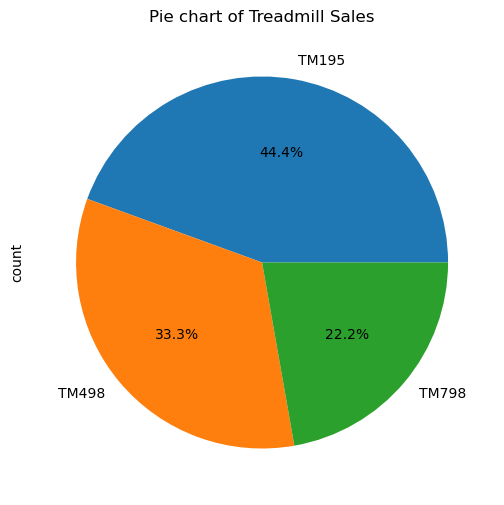

In [ ]:
plt.figure(figsize=(11,5))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,7))
plt.title("Pie chart of Treadmill Sales")
plt.show()

In [ ]:
#Average age of customer buying each model
df.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [ ]:
#Average Income of customers buying each model
df.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

Text(0.5, 1.0, 'TREADMILL BY GENDER')

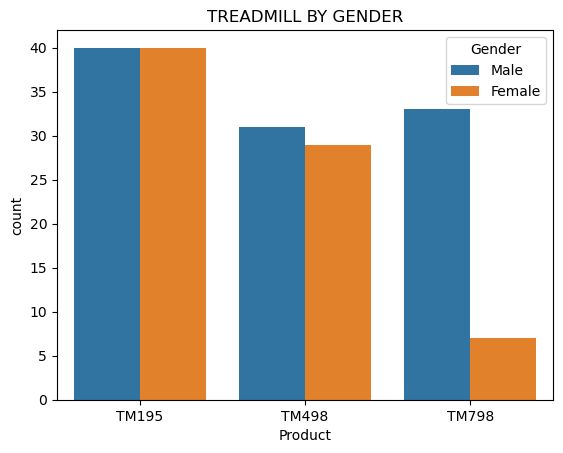

In [ ]:
sns.countplot(x="Product",hue="Gender",data=df)
plt.title("TREADMILL BY GENDER")

- TM195 model was equally bought by males and females.
- Compared to female, male bought TM498 model.
- TM798 model is more popular among males than females.


Text(0.5, 1.0, 'TREADMILL BY MARITAL STATUS')

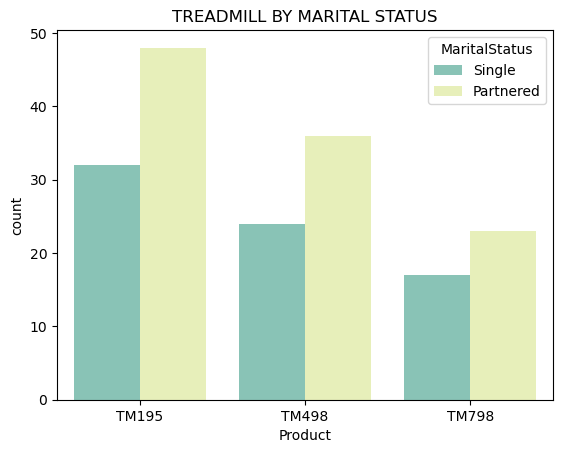

In [ ]:
custom_palette = ["#7fcdbb", "#edf8b1"]

sns.countplot(x="Product",hue="MaritalStatus",data=df,palette=custom_palette)
plt.title("TREADMILL BY MARITAL STATUS")

Text(0.5, 1.0, 'MARITAL STATUS BY GENDER')

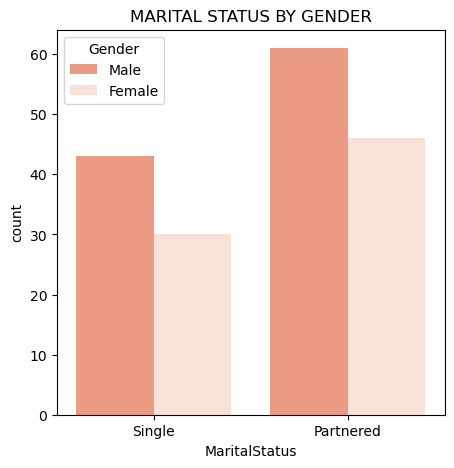

In [ ]:
custom_palette =["#fc9272", "#fee0d2"]
plt.figure(figsize=(5,5))
sns.countplot(x="MaritalStatus",hue="Gender",data=df,palette=custom_palette )
plt.title("MARITAL STATUS BY GENDER")

In [ ]:
average_age_per_gender = df.groupby(['Product', 'MaritalStatus','Gender'])['Usage'].mean()
print(average_age_per_gender)
average_age_per_gender = average_age_per_gender.reset_index()


Product  MaritalStatus  Gender
TM195    Partnered      Female    2.851852
                        Male      3.285714
         Single         Female    3.000000
                        Male      3.263158
TM498    Partnered      Female    3.333333
                        Male      2.857143
         Single         Female    2.928571
                        Male      3.300000
TM798    Partnered      Female    5.250000
                        Male      4.842105
         Single         Female    4.666667
                        Male      4.571429
Name: Usage, dtype: float64


- Partnered customer expects to run more miles than a single customer
- Income of partnered customer higher than income of single customer
- Age of partnered customer higher than age of single customer
- There are more single men buying treadmills than single women
- Self-rated fitness of partnered and single customers are not the same
- Education of Partnered and Single customers is the same

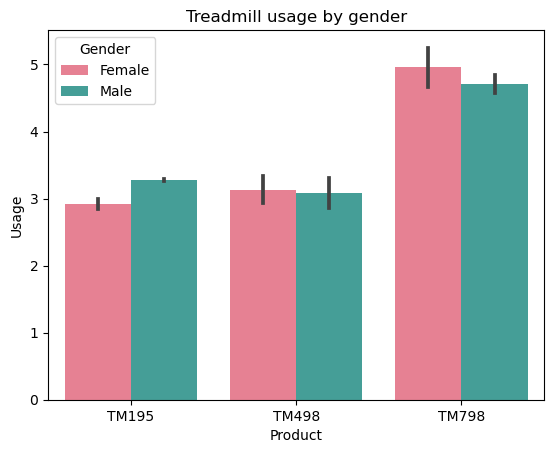

In [ ]:
custom_palette = sns.color_palette("husl", 2)
sns.barplot(data=average_age_per_gender, x='Product', y='Usage', hue='Gender', palette=custom_palette).set_title('Treadmill usage by gender')
plt.show()


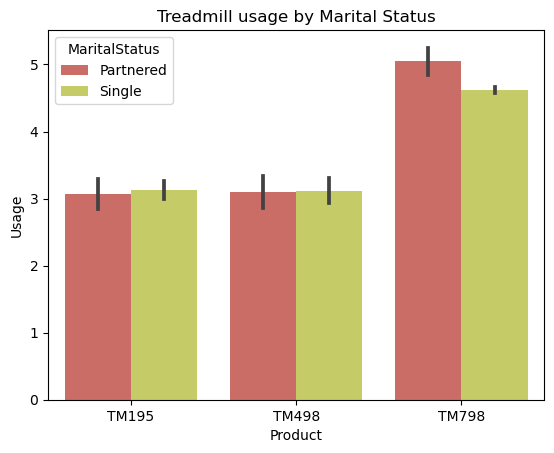

In [ ]:

custom_palette = sns.color_palette("hls" )
sns.barplot(data=average_age_per_gender, x='Product', y='Usage', hue='MaritalStatus', palette=custom_palette).set_title('Treadmill usage by Marital Status')
plt.show()


[Text(0.5, 1.0, 'Marital Status by Miles')]

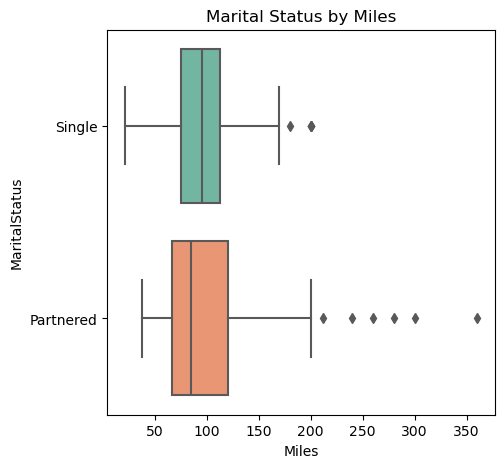

In [ ]:
plt.figure(figsize=(5,5))
figsize=(18, 19)
custom_palette = sns.color_palette("Set2")
sns.boxplot(x=df['Miles'], y=df['MaritalStatus'], ax= None,palette=custom_palette).set(title ='Marital Status by Miles')

[Text(0.5, 1.0, 'Marital Status by Usage')]

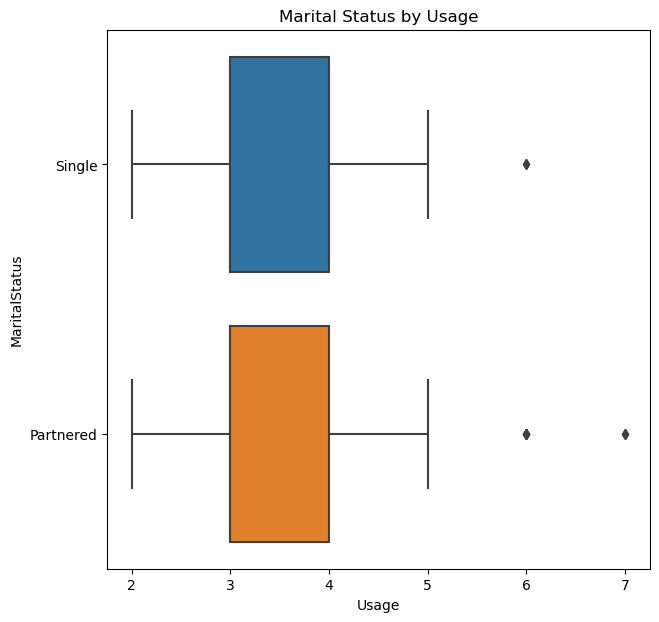

In [ ]:
plt.figure(figsize=(7,7))
figsize=(18, 19)
sns.boxplot(x=df['Usage'], y=df['MaritalStatus'], ax= None).set(title ='Marital Status by Usage')

[Text(0.5, 1.0, 'Marital Status by Fitness')]

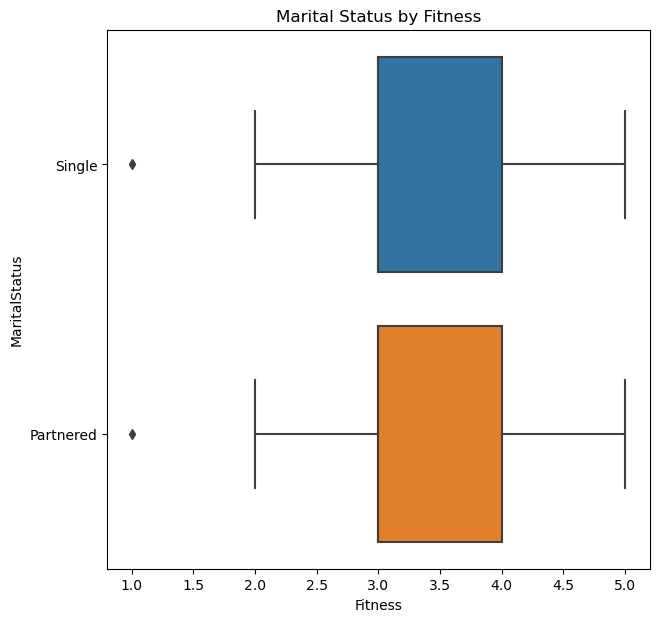

In [ ]:
plt.figure(figsize=(7,7))
figsize=(18, 19)
sns.boxplot(x=df['Fitness'], y=df['MaritalStatus'], ax= None).set(title ='Marital Status by Fitness')

<Axes: xlabel='Education', ylabel='MaritalStatus'>

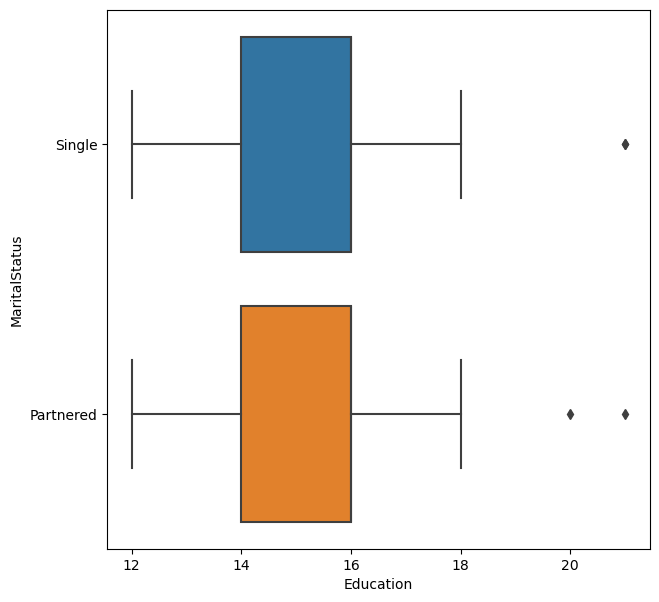

In [ ]:
plt.figure(figsize=(7,7))
figsize=(18, 19)
sns.boxplot(x=df['Education'], y=df['MaritalStatus'], ax= None)

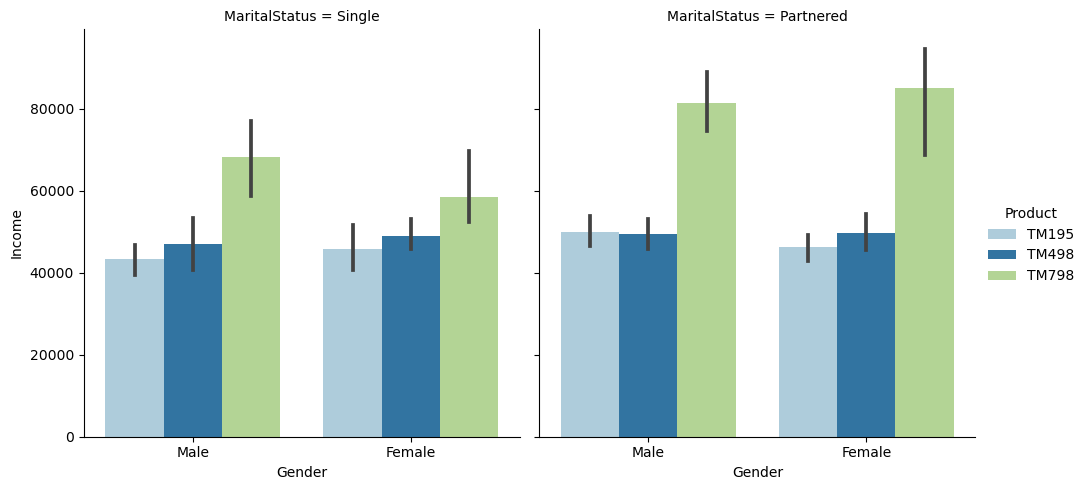

In [ ]:
# Income by gender by product and by marital status
custom_palette = sns.color_palette("Paired")
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df,kind='bar',palette=custom_palette);

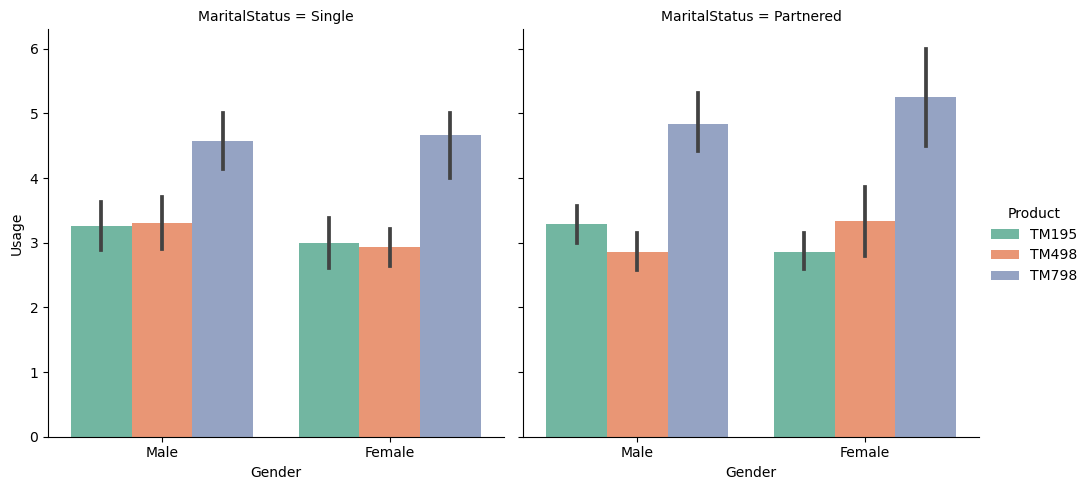

In [ ]:
# Usage by gender by product and by marital status
custom_palette = sns.color_palette("Set2")
sns.catplot(x='Gender',y='Usage', hue='Product', col='MaritalStatus', data=df,kind='bar',palette=custom_palette);

- Partnered females bought TM195 Model compared to Partnered male.
- Single female customers bought TM498 model more than Single male customers.
- Partnered male customers bought TM798 model more than Single male customers.
- There are more single males buying Treadmill than single Females.
- Single male customers bought TM195 Model compared to Single female.
- Majority of people who buy the TM798 are men and partnered.
- The majority of our buyers are men.

<Figure size 1200x700 with 0 Axes>

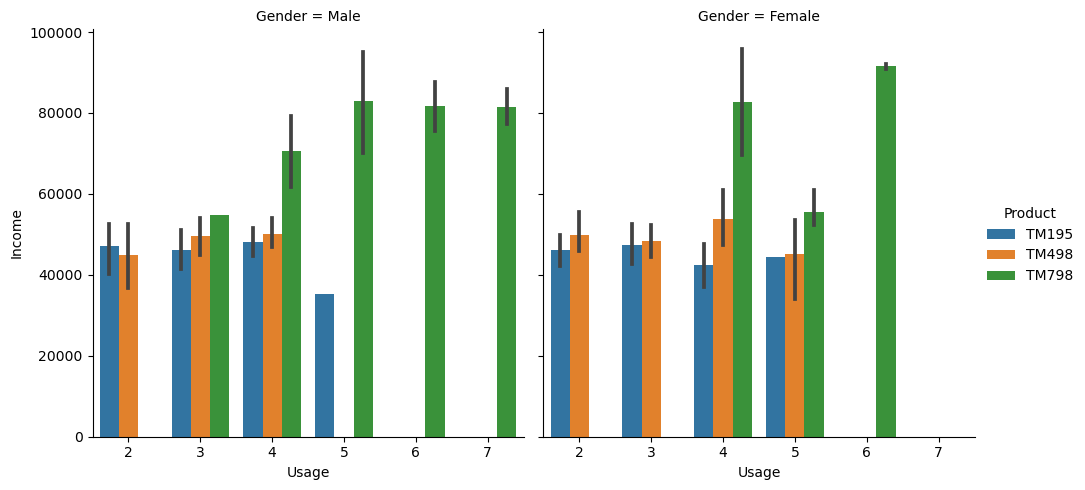

In [ ]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=df) 

<Axes: xlabel='Usage', ylabel='Income'>

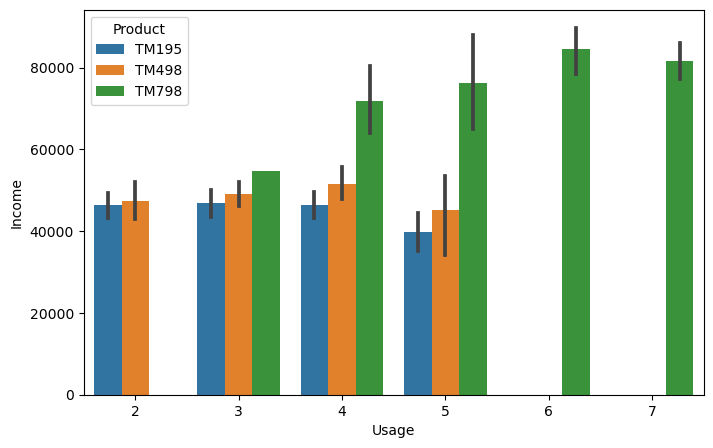

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot( data=df,x='Usage', y='Income', hue='Product') 

Text(0.5, 1.0, 'Product by age')

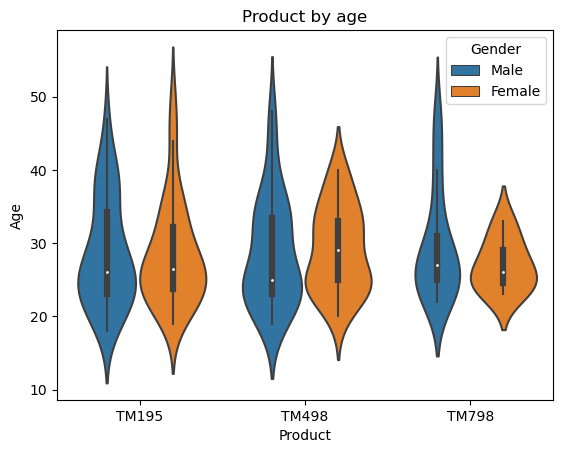

In [ ]:
sns.violinplot(data=df, x='Product', y='Age', hue='Gender').set_title('Product by age')

Text(0.5, 1.0, 'Product by usage')

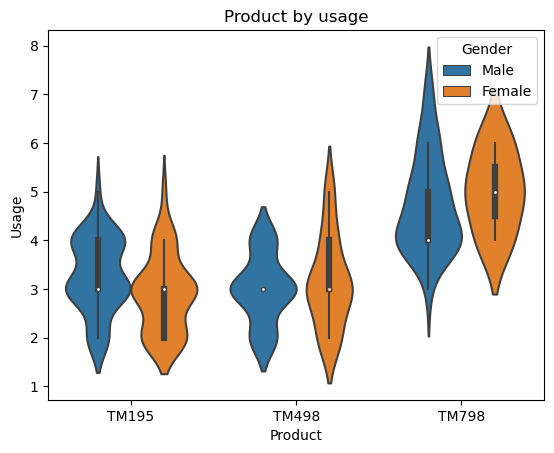

In [ ]:
sns.violinplot(data=df, x='Product', y='Usage', hue='Gender').set_title('Product by usage')

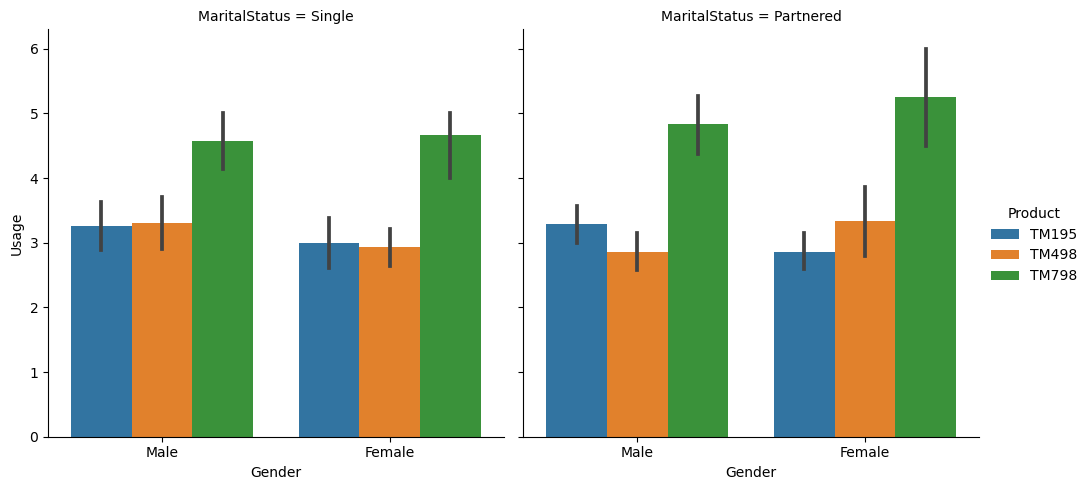

In [ ]:
# Usage by gender by product and by marital status
sns.catplot(x='Gender',y='Usage', hue='Product', col='MaritalStatus', data=df,kind='bar');

- Male customers with higher income ,bought TM798 Model and expect to use treadmill 4-6 times/week
- Customers who bought TM195 and TM498 are in same income range and expect to use treadmill 3-4 times/week

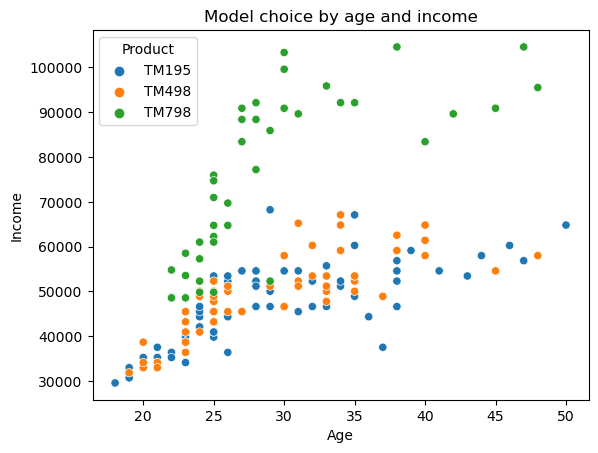

In [ ]:
sns.scatterplot(x='Age', y='Income',data=df, hue ='Product').set_title('Model choice by age and income')
plt.show()

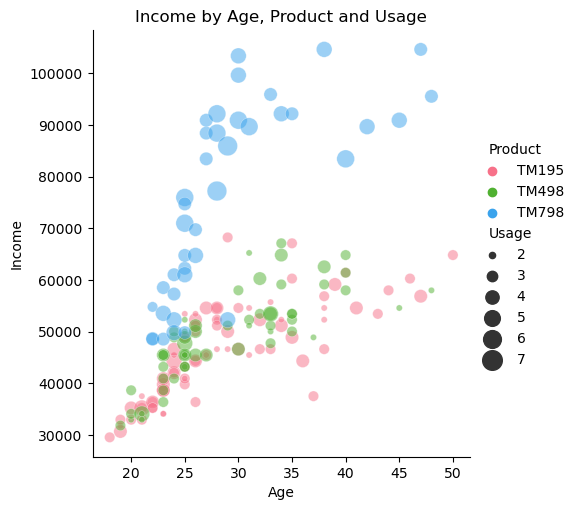

In [ ]:
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(20, 200), alpha=.5, palette="husl",
            height=5, data=df).set(title='Income by Age, Product and Usage');